In [291]:
# IMPORTING THE PACKAGES
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

import warnings
warnings.filterwarnings("ignore")

In [292]:
# LOADING THE DATASET
data = pd.read_excel('Social_Network_Ads.xlsx')
data.head(5)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


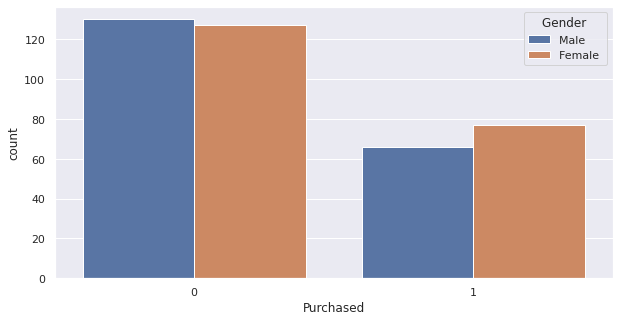

In [293]:
# EXPLORATORY DATA ANALYSIS
# COUNT OF PERSON PURCHASED THE CAR OR NOT BASED ON THEIR GENDER
sns.countplot(data['Purchased'],hue = data['Gender '])

Text(0.5, 1.0, 'Distribution of Salary amongst the Customers')

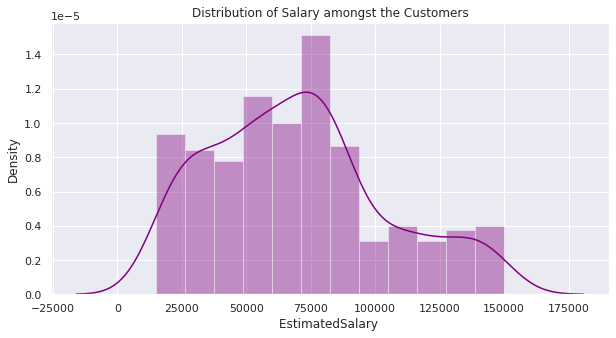

In [294]:
# DISTRIBUTION OF SALARY AMONGST THE CUSTOMERS
sns.distplot(data['EstimatedSalary '],color='purple')
plt.title('Distribution of Salary amongst the Customers')

In [295]:
# SPLITTING TRAINING AND TEST DATA
x = data.iloc[:, [2, 3]].values
y = data.iloc[:, 4].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

In [296]:
# SCALING THE DATA
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

Classification Report

               precision    recall  f1-score   support

           0       0.87      0.94      0.90        79
           1       0.86      0.73      0.79        41

    accuracy                           0.87       120
   macro avg       0.86      0.83      0.85       120
weighted avg       0.87      0.87      0.86       120


Model Accuracy: 86.66666666666667


Confusion Matrix


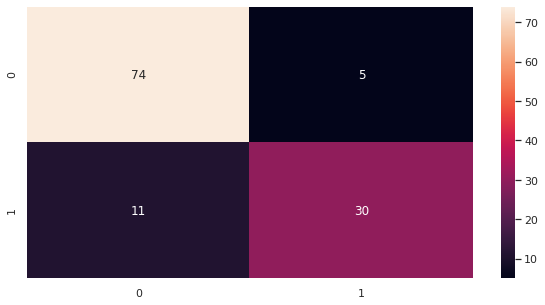

In [297]:
# LOGISTIC REGRESSION
model = LogisticRegression()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
lgacc = accuracy_score(y_test,y_pred)*100
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True)
print('Classification Report\n\n', classification_report(y_test, y_pred))
print('\nModel Accuracy:', lgacc)
print("\n\nConfusion Matrix")

In [298]:
# CHECKING FOR NEIGHBOURS IN KNN
model = KNeighborsClassifier(n_neighbors=5)
model.fit(x_train, y_train)
neighbors = np.arange(1,9)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    train_accuracy[i] = knn.score(x_train, y_train)
    test_accuracy[i] = knn.score(x_test, y_test)

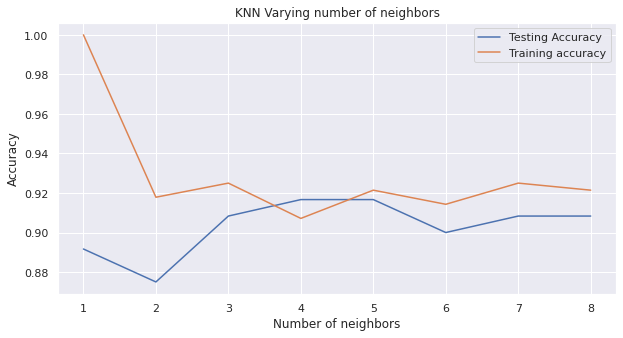

In [299]:
# KNN GRAPH
plt.title('KNN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

Classification Report

               precision    recall  f1-score   support

           0       0.93      0.95      0.94        79
           1       0.90      0.85      0.88        41

    accuracy                           0.92       120
   macro avg       0.91      0.90      0.91       120
weighted avg       0.92      0.92      0.92       120


Model Accuracy: 91.66666666666666


Confusion Matrix


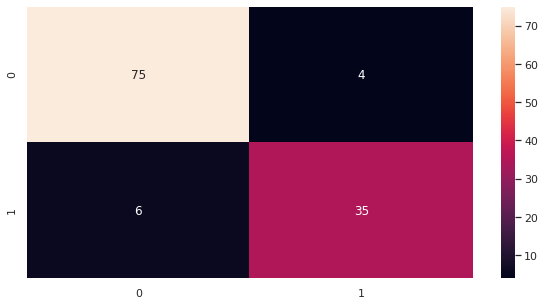

In [300]:
# KNN CLASSIFIER
model = KNeighborsClassifier(n_neighbors=4)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
knnacc = accuracy_score(y_test,y_pred)*100
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True)
print('Classification Report\n\n', classification_report(y_test, y_pred))
print('\nModel Accuracy:', knnacc)
print("\n\nConfusion Matrix")

Classification Report

               precision    recall  f1-score   support

           0       0.90      0.94      0.92        79
           1       0.87      0.80      0.84        41

    accuracy                           0.89       120
   macro avg       0.89      0.87      0.88       120
weighted avg       0.89      0.89      0.89       120


Model Accuracy: 89.16666666666667


Confusion Matrix


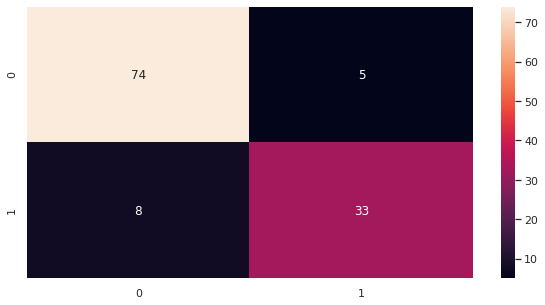

In [301]:
# NAIVE BAYES CLASSIFIER
model = GaussianNB()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
nbacc = accuracy_score(y_test,y_pred)*100
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True)
print('Classification Report\n\n', classification_report(y_test, y_pred))
print('\nModel Accuracy:', nbacc)
print("\n\nConfusion Matrix")

Classification Report

               precision    recall  f1-score   support

           0       0.91      0.89      0.90        79
           1       0.79      0.83      0.81        41

    accuracy                           0.87       120
   macro avg       0.85      0.86      0.85       120
weighted avg       0.87      0.87      0.87       120


Model Accuracy: 86.66666666666667


Confusion Matrix


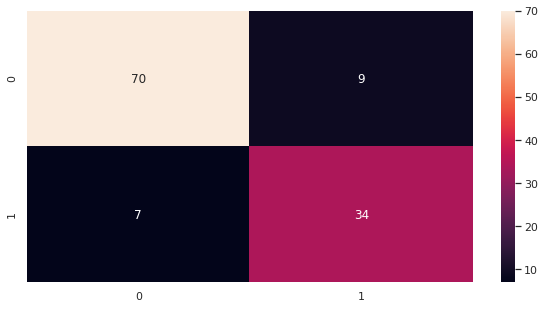

In [302]:
# DECISION TREE CLASSIFIER
model = DecisionTreeClassifier()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
dtacc = accuracy_score(y_test,y_pred)*100
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True)
print('Classification Report\n\n', classification_report(y_test, y_pred))
print('\nModel Accuracy:', dtacc)
print("\n\nConfusion Matrix")

Classification Report

               precision    recall  f1-score   support

           0       0.94      0.92      0.93        79
           1       0.86      0.88      0.87        41

    accuracy                           0.91       120
   macro avg       0.90      0.90      0.90       120
weighted avg       0.91      0.91      0.91       120


Model Accuracy: 90.83333333333333


Confusion Matrix


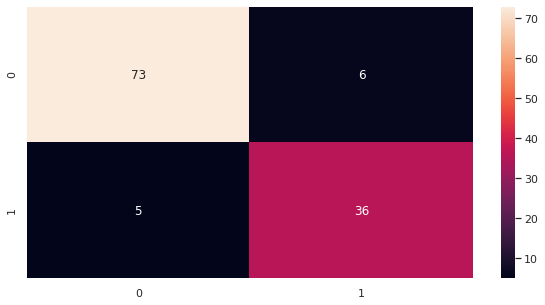

In [303]:
# RANDOM FOREST CLASSIFIER
model = RandomForestClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
rfacc = accuracy_score(y_test,y_pred)*100
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True)
print('Classification Report\n\n', classification_report(y_test, y_pred))
print('\nModel Accuracy:', rfacc)
print("\n\nConfusion Matrix")

Classification Report

               precision    recall  f1-score   support

           0       0.95      0.91      0.93        79
           1       0.84      0.90      0.87        41

    accuracy                           0.91       120
   macro avg       0.89      0.91      0.90       120
weighted avg       0.91      0.91      0.91       120


Model Accuracy: 90.83333333333333


Confusion Matrix


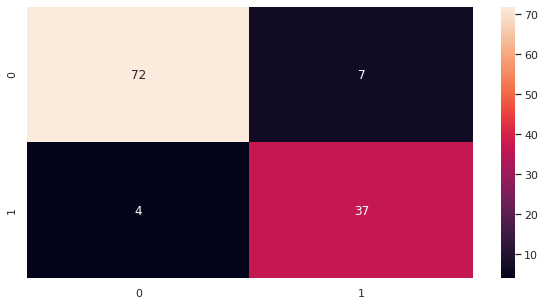

In [304]:
# SUPPORT VECTOR MACHINES
model = svm.SVC()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
svmacc = accuracy_score(y_test,y_pred)*100
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True)
print('Classification Report\n\n', classification_report(y_test, y_pred))
print('\nModel Accuracy:', svmacc)
print("\n\nConfusion Matrix")

The accuracy score achieved using KNN is: 91.66666666666666 %
The accuracy score achieved using Logistic Regression is: 86.66666666666667 %
The accuracy score achieved using Naive Bayes is: 89.16666666666667 %
The accuracy score achieved using Decision Tree is: 86.66666666666667 %
The accuracy score achieved using Random Forest is: 90.83333333333333 %
The accuracy score achieved using SVM is: 90.83333333333333 %


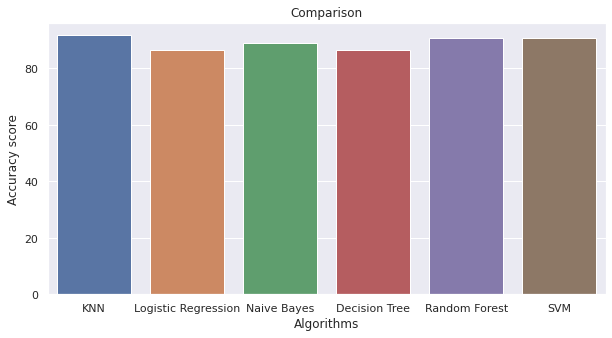

In [305]:
# COMPARING ALL THE MODELS
scores = [knnacc,lgacc,nbacc,dtacc,rfacc,svmacc]
algorithms = ["KNN","Logistic Regression","Naive Bayes","Decision Tree","Random Forest","SVM"]
for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")
sns.set(rc={'figure.figsize':(10,5)})
plt.title("Comparison")
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")
sns.barplot(algorithms,scores)